# Chapter 6 경진대회 : 자전거 대여 수요 예측

# 학습 목표 
머신러닝을 이용한 문제 해결 프로세스 
- 데이터 구성 확인
- 데이터 시각화 
- 회귀 모델 훈련/평가
- 훈련된 모델 제출 및 평가 

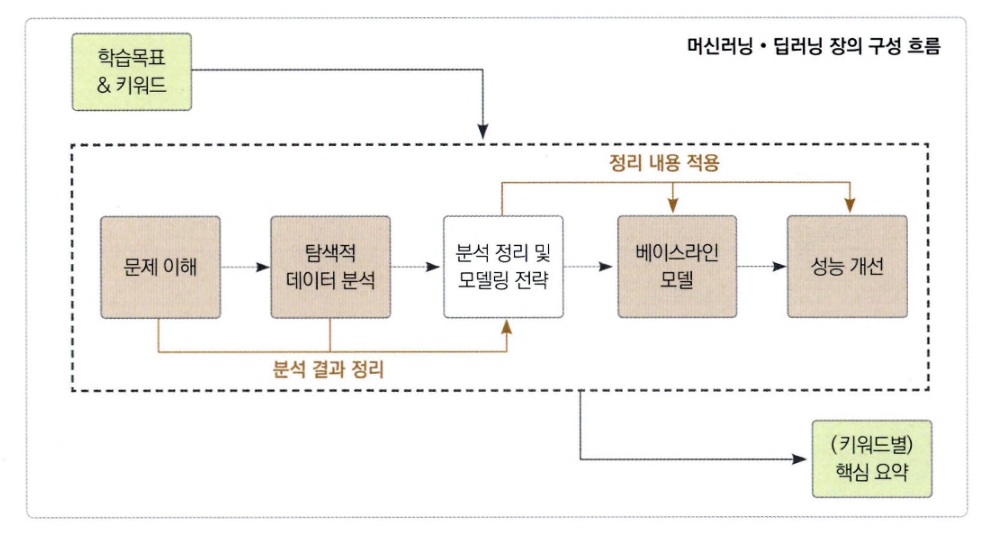

# 6.1 경진대회 이해 
자전거 대여 수요 예측 경진대회 (https://www.kaggle.com/competitions/bike-sharing-demand/overview) 
- Playground competition (“for fun” type of Kaggle competition)
    - https://www.kaggle.com/docs/competitions#types-of-competitions

전체 데이터 크기가 1.1MB로 작고 피처 수도 적어 입문하기 좋음

# 6.2 경진대회 접속 방법 및 세부 메뉴
## Overview 
- 대회 개요 설명 
    - 워싱턴 D.C Capital Bikeshare의 자전거 대여에 대한 수요 예측 
- 평가 방법 (6.2 끝에 다시 설명)
    - RMSLE
- 제출 형식 

## Data sample 
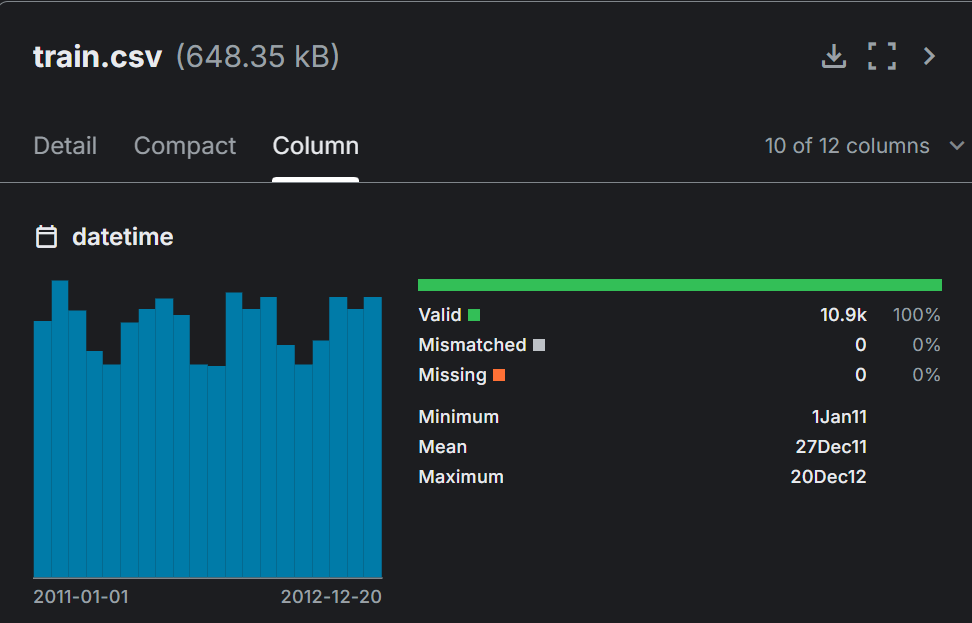

## Code 
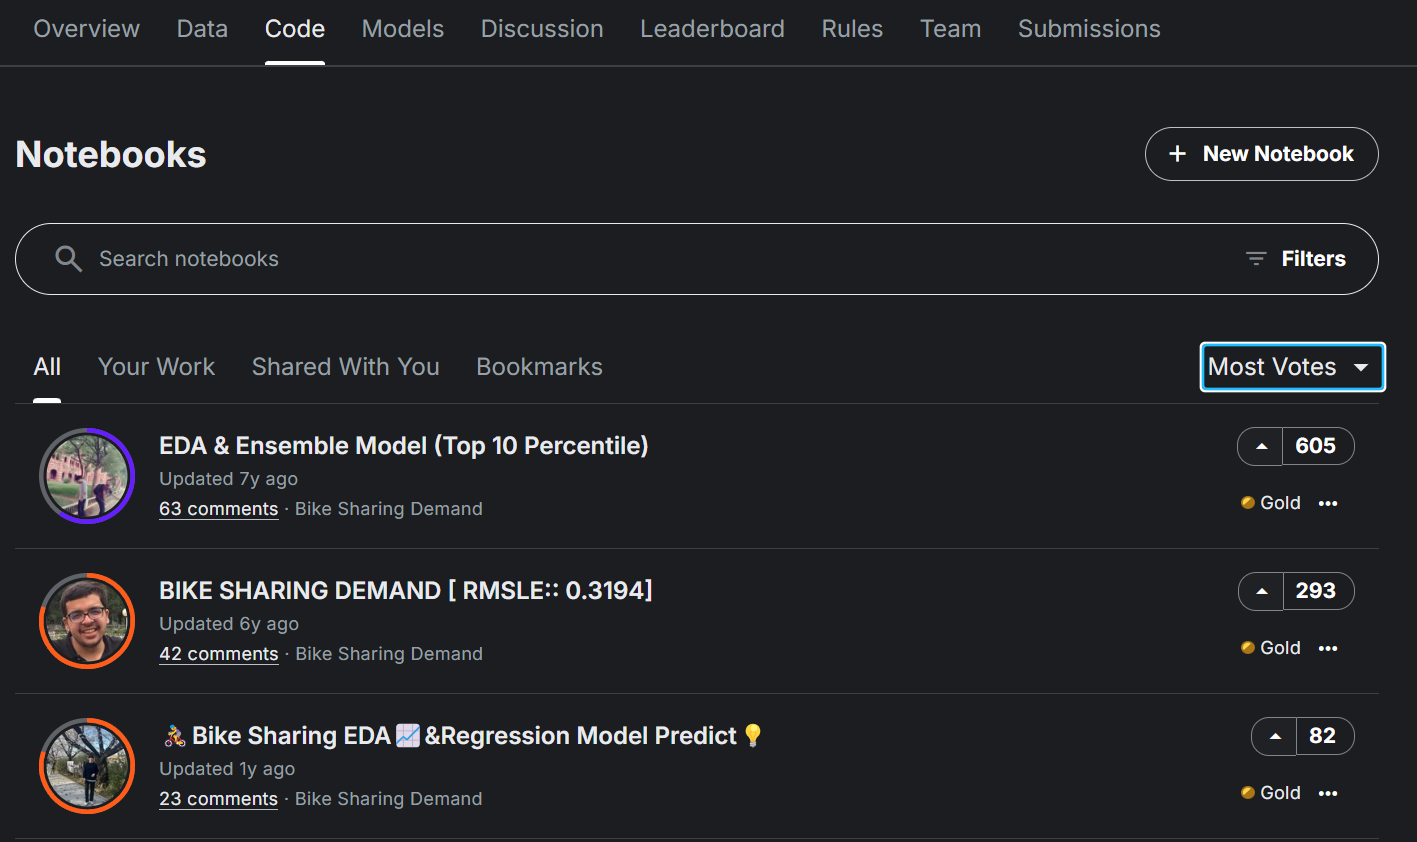

## Disscussion
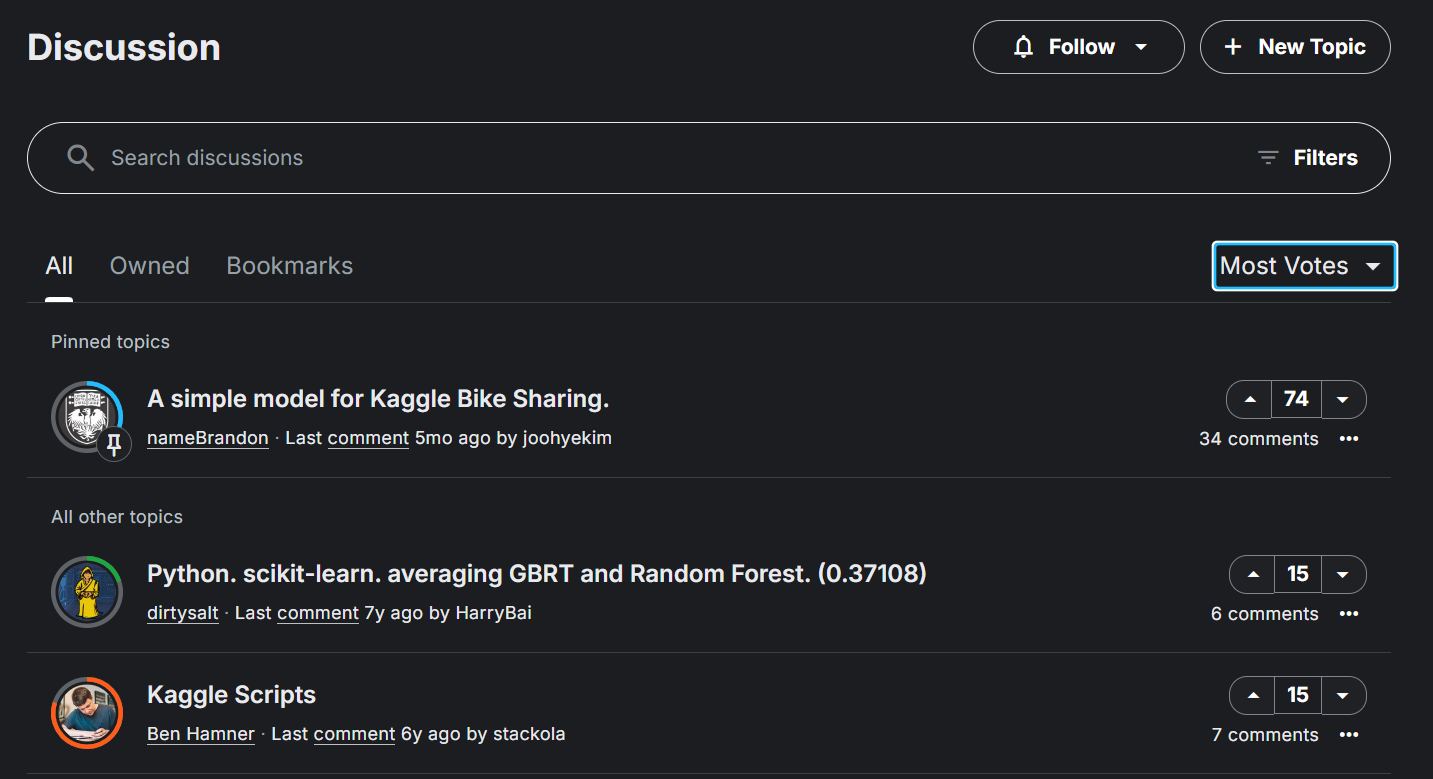

## Leaderboard
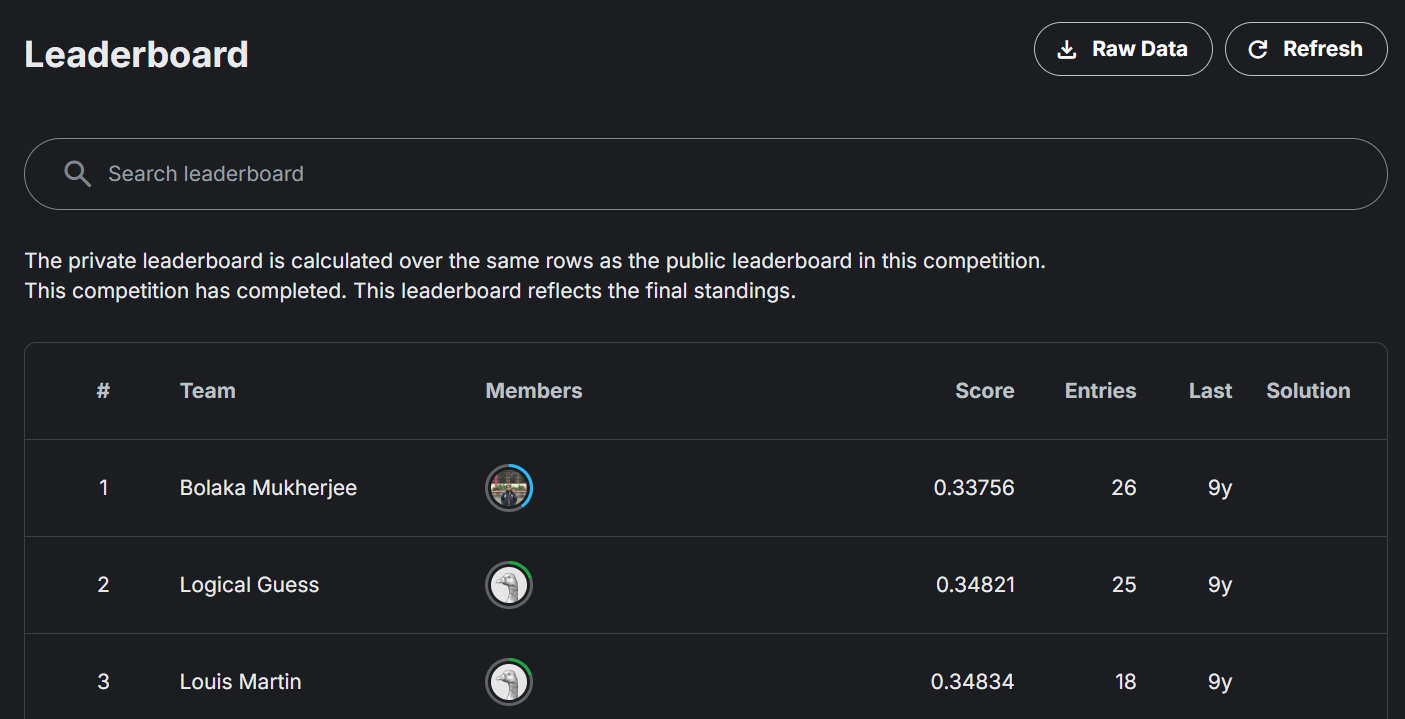
- 자전거 수요 예측 경진대회의 경우 테스트 데이터 전체를 사용해 평가하기 때문에 public, private 구분하지 않음.

Public, Private Leaderboard


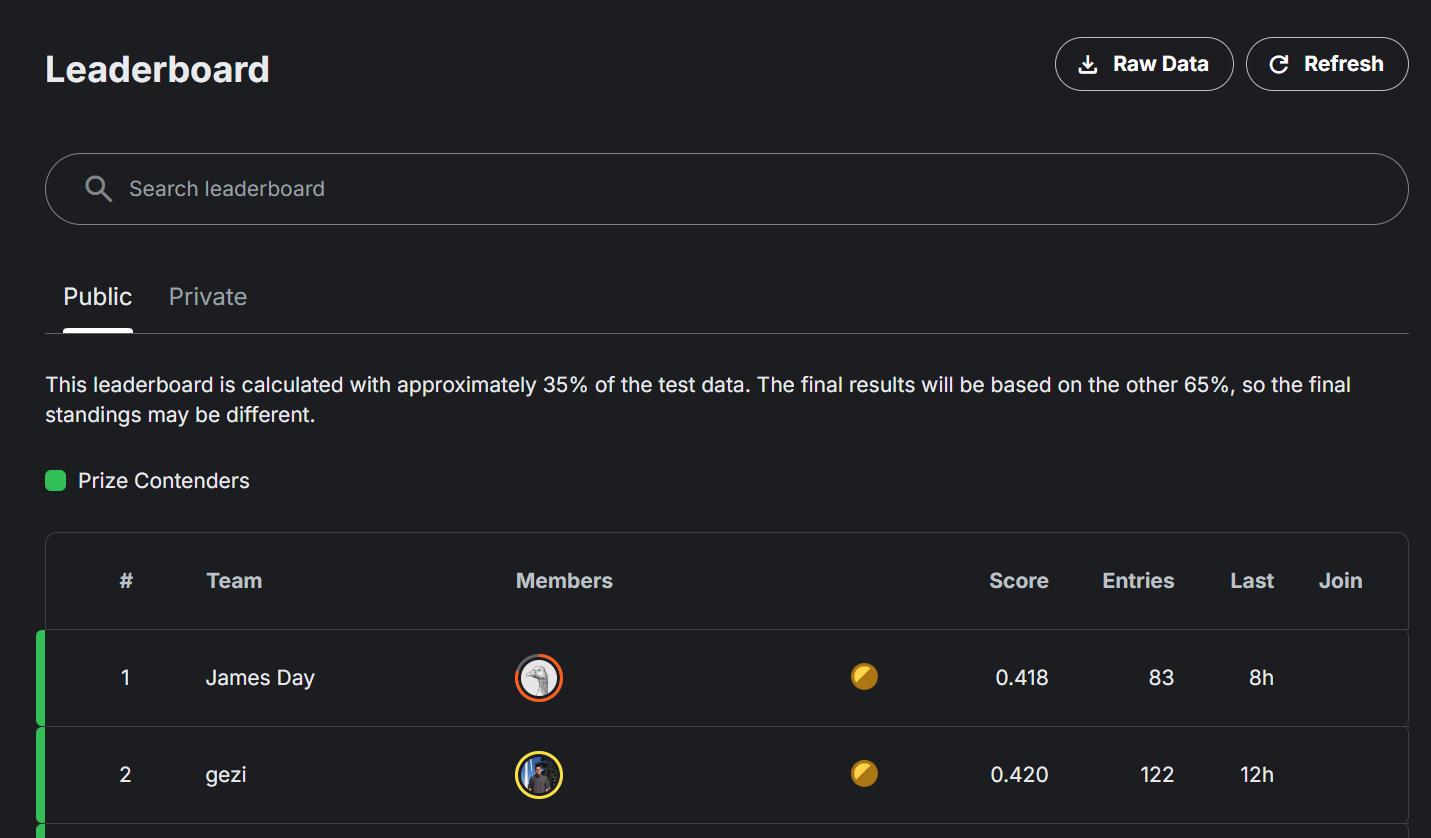

## Rules 
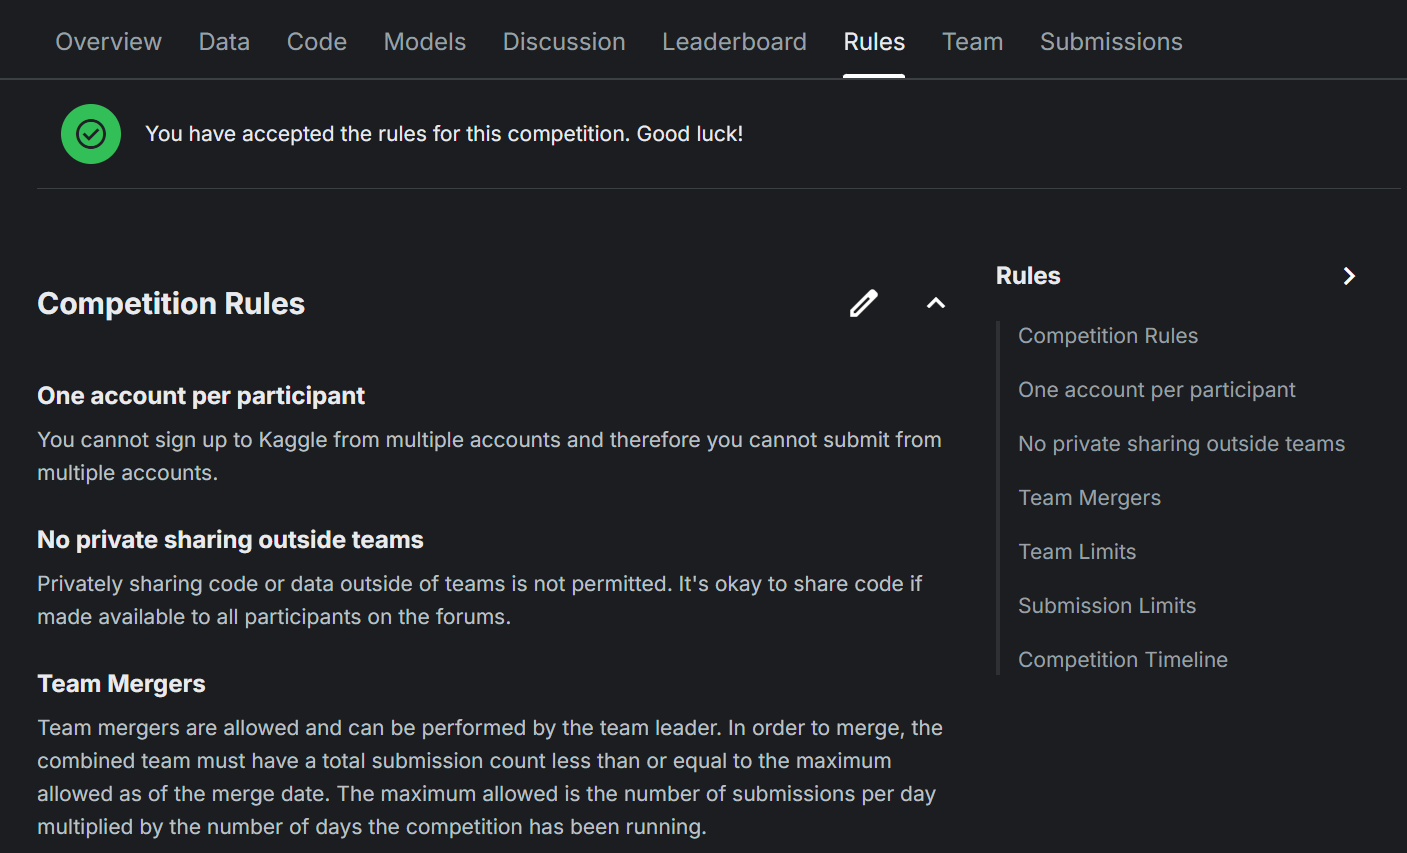
## Team 
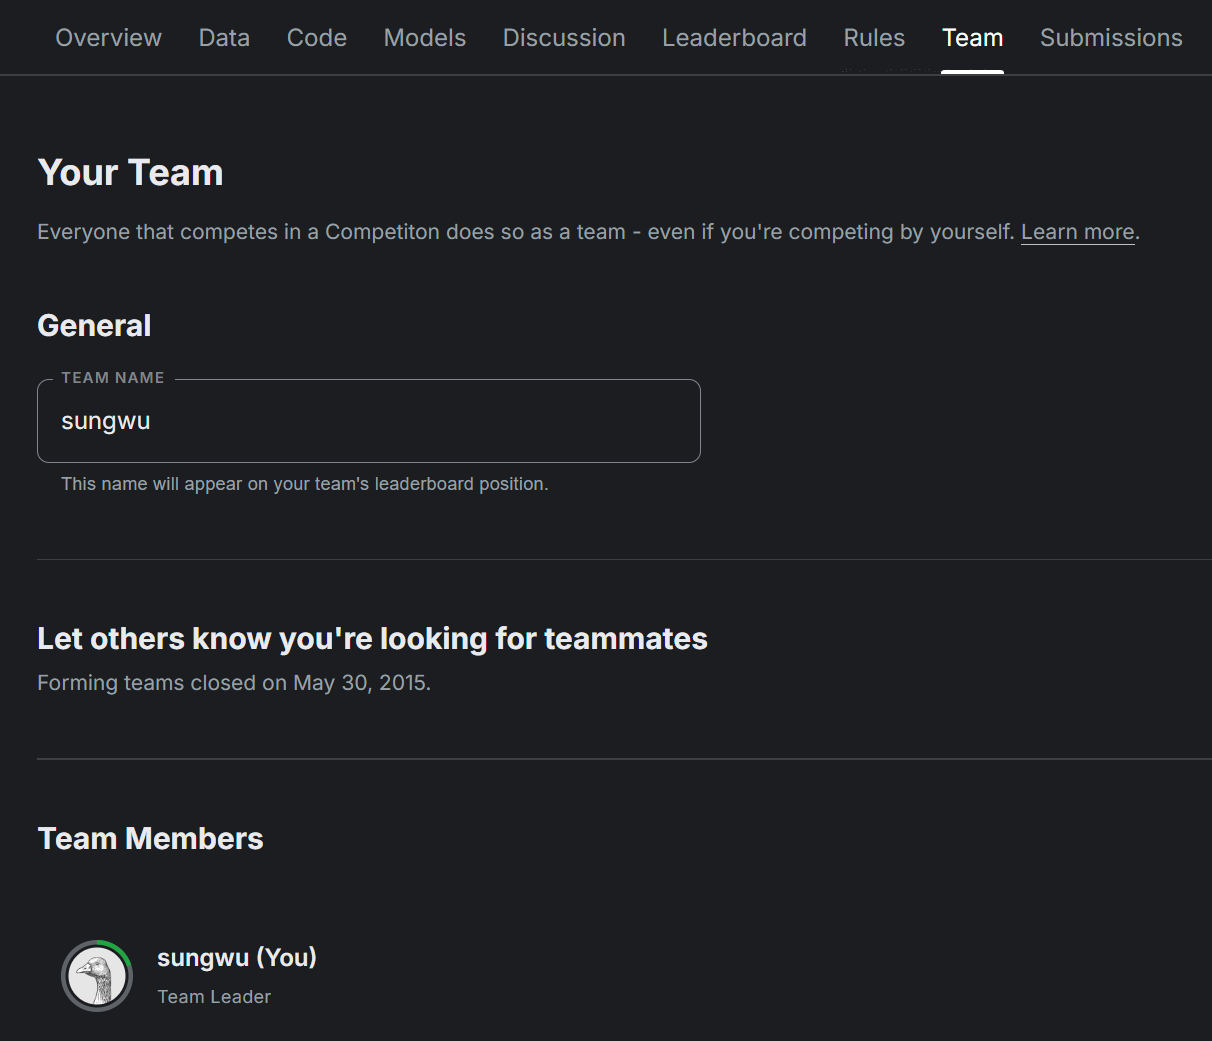

## Evaluation 
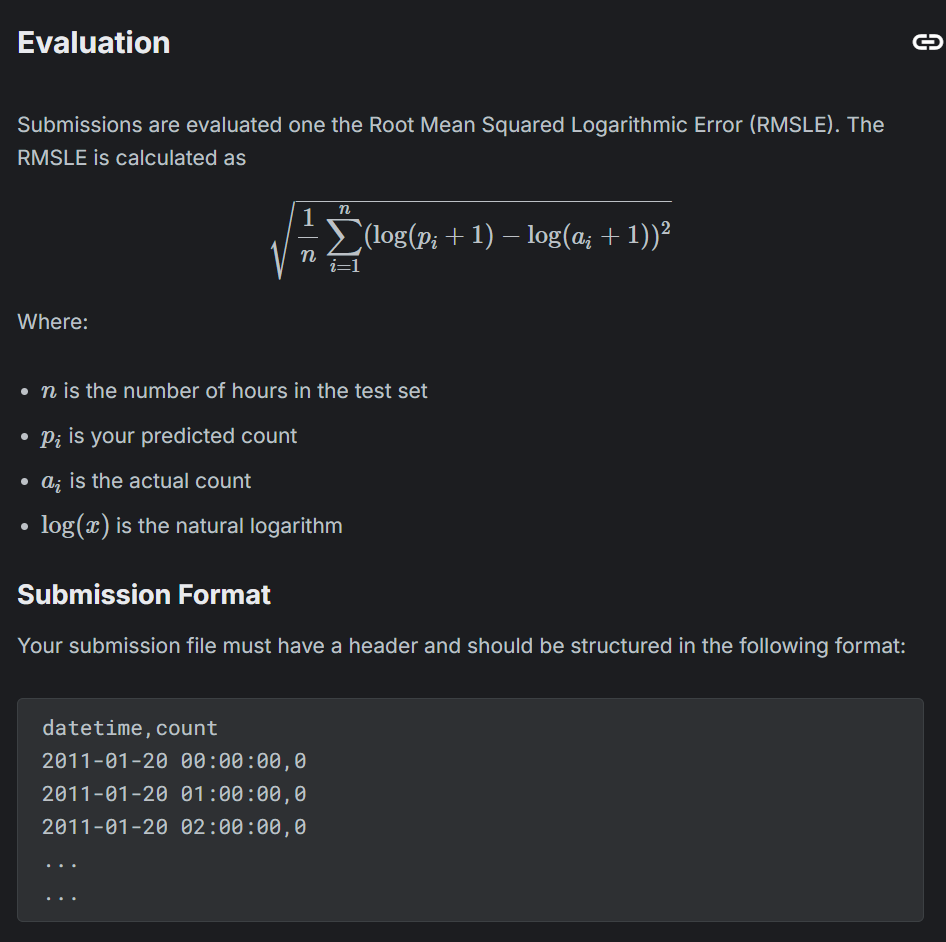
- 평가 지표 : RMSLE (Root Mean Squared Logarithmic Error) 
- 제출 형식 : datetime, count(대여수량, default=0) 

#### RMSLE는 언제 쓸까 ?
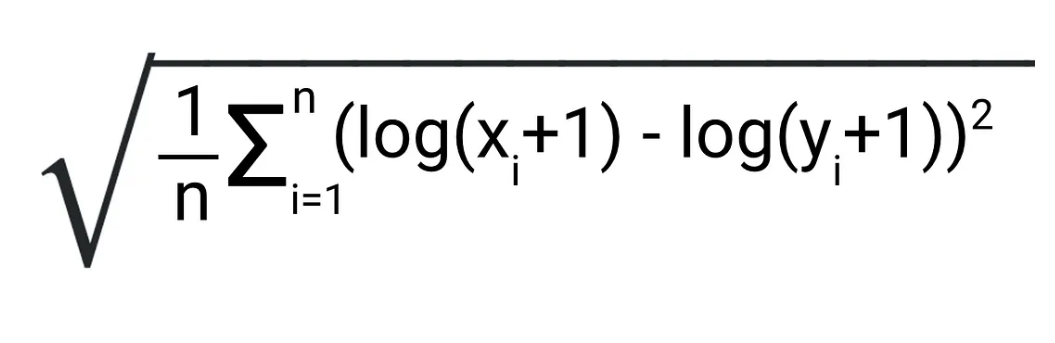

RMSLE 설명 참조 : https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

##### 특징 1. 오차의 상대적인 크기를 고려할 때
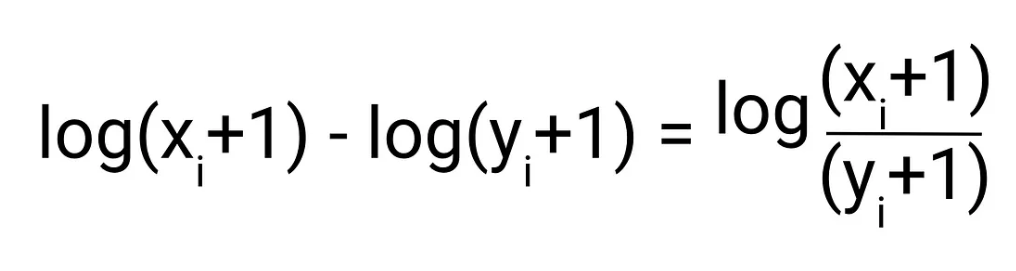

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Case 1
y_true_case1 = np.array([100])
y_pred_case1 = np.array([90])

rmse_case1 = np.sqrt(mean_squared_error(y_true_case1, y_pred_case1))
rmsle_case1 = np.sqrt(mean_squared_log_error(y_true_case1, y_pred_case1))

print("Case 1:")
print(f"True: {y_true_case1[0]}")
print(f"Pred: {y_pred_case1[0]}")
print(f"RMSE: {rmse_case1:.4f}")
print(f"RMSLE: {rmsle_case1:.4f}\n")

# Case 2
y_true_case2 = np.array([10000])
y_pred_case2 = np.array([9000])

rmse_case2 = np.sqrt(mean_squared_error(y_true_case2, y_pred_case2))
rmsle_case2 = np.sqrt(mean_squared_log_error(y_true_case2, y_pred_case2))

print("Case 2:")
print(f"True: {y_true_case2[0]}")
print(f"Pred: {y_pred_case2[0]}")
print(f"RMSE: {rmse_case2:.4f}")
print(f"RMSLE: {rmsle_case2:.4f}")


Case 1:
True: 100
Pred: 90
RMSE: 10.0000
RMSLE: 0.1043

Case 2:
True: 10000
Pred: 9000
RMSE: 1000.0000
RMSLE: 0.1053


##### 특징 2. 과소예측에 더 많은 패널티를 부여함

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Case 1: Underestimation
y_true_case1 = np.array([1000])
y_pred_case1 = np.array([600])

rmse_case1 = np.sqrt(mean_squared_error(y_true_case1, y_pred_case1))
rmsle_case1 = np.sqrt(mean_squared_log_error(y_true_case1, y_pred_case1))

print("Case 1: Underestimation")
print(f"True: {y_true_case1[0]}")
print(f"Pred: {y_pred_case1[0]}")
print(f"RMSE: {rmse_case1:.2f}")
print(f"RMSLE: {rmsle_case1:.3f}\n")

# Case 2: Overestimation
y_true_case2 = np.array([1000])
y_pred_case2 = np.array([1400])

rmse_case2 = np.sqrt(mean_squared_error(y_true_case2, y_pred_case2))
rmsle_case2 = np.sqrt(mean_squared_log_error(y_true_case2, y_pred_case2))

print("Case 2: Overestimation")
print(f"True: {y_true_case2[0]}")
print(f"Pred: {y_pred_case2[0]}")
print(f"RMSE: {rmse_case2:.2f}")
print(f"RMSLE: {rmsle_case2:.3f}")

Case 1: Underestimation
True: 1000
Pred: 600
RMSE: 400.00
RMSLE: 0.510

Case 2: Overestimation
True: 1000
Pred: 1400
RMSE: 400.00
RMSLE: 0.336


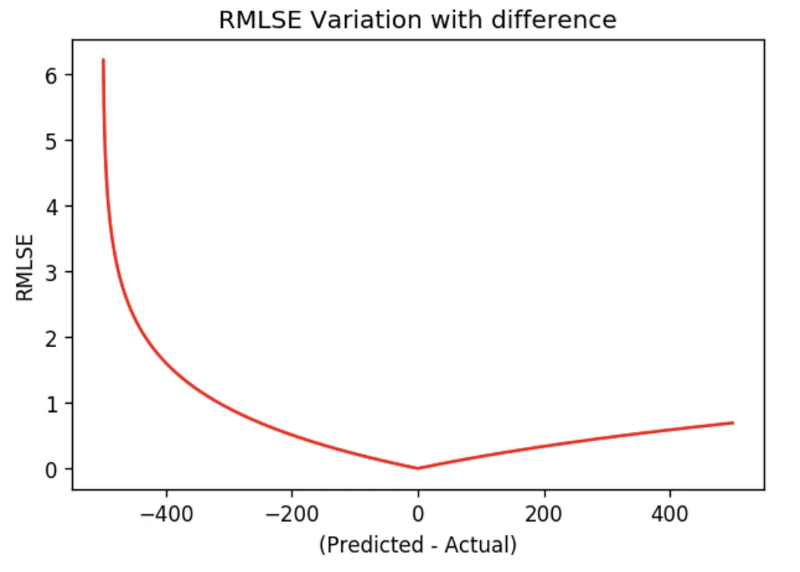

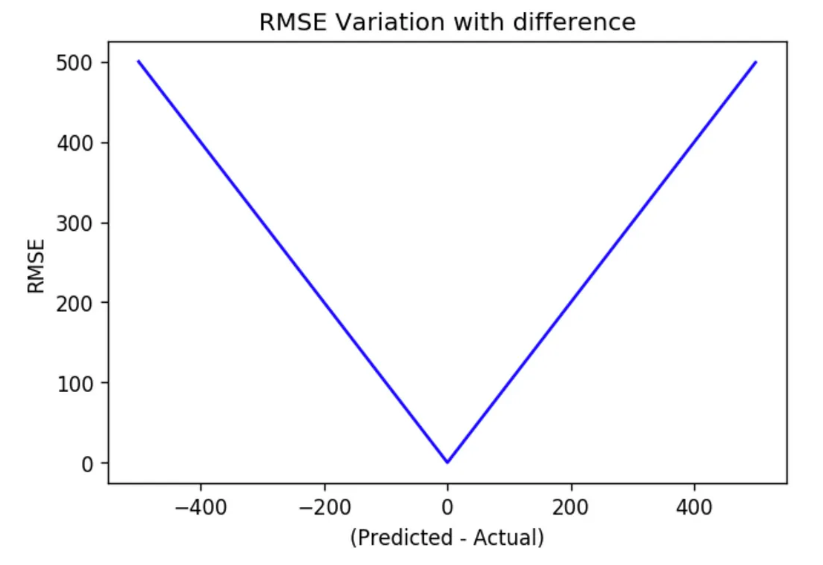


- 택배 배송, 음식 배달 등
- 자전거 수요 예측 


# 6.3 탐색적 데이터 분석, EDA(Exploratory Data Analysis)
문제 : 자전거 무인 대여 시스템의 과거 기록을 이용하여 향후 수요를 예측하는 것

참고 코드 : https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile 

## 6.3.1 캐글 노트북 환경 설정 


In [62]:
# !python --version
# !pip install numpy==1.19.5
# !pip install pandas==1.3.2
# !pip install seaborn==0.11.2
# !pip install matplotlib==3.4.3
# !pip install scikit-learn==0.23.2

## 6.3.2 데이터 둘러보기 

- 데이터를 확인하면서 향후 처리해야할 내용들을 '분석 결과'로 기록함

In [63]:
import numpy as np 
import pandas as pd
data_path = 'data/bike-sharing-demand/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')
train.shape, test.shape

((10886, 12), (6493, 9))

In [64]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

- datetime : 기록일시 
- season : 계절 (1~4) 
- holiday : 공휴일 여부 (0:flase, 1:true) 
- workingday : 근무일 여부 (0:false, 1:true), 주말과 공휴일이 아닌 경우 근무일임
- weather : 날씨 (1:맑음, 2:약간 흐림, 3:흐림, 약간의 비 또는 눈, 4: 폭우, 천둥번개) 
- temp : 실제 온도
- atemp : 체감 온도 
- humidity : 상대 습도 
- windspeed : 풍속
- casual : 비회원 수 
- registered : 등록된 사용자 수 
- count : 자전거 대여 수량 

In [65]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

#### 분석 결과 
- casual와 registered가 빠져있음 
- 훈련할 때도 제외해야함 

In [66]:
def compare_columns(df1, df2):
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)
    
    # Columns only in df1
    only_in_df1 = columns_df1 - columns_df2
    # Columns only in df2
    only_in_df2 = columns_df2 - columns_df1
    
    return only_in_df1, only_in_df2

only_in_train, only_in_test = compare_columns(train, test)

print("Columns only in train:", only_in_train)
print("Columns only in test:", only_in_test)

Columns only in train: {'casual', 'registered', 'count'}
Columns only in test: set()


In [67]:
submission.head() 

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

#### 분석 결과 
- datetime은 데이터를 구분하는 역할만 하므로 모델 훈련 시 제거
- 날짜, 시간과 같은 정보는 따로 추출

In [68]:
train.info() # info() : DataFrame에 대한 정보 제공.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 6.3.3 더 효과적인 분석을 위한 피처 엔지니어링 
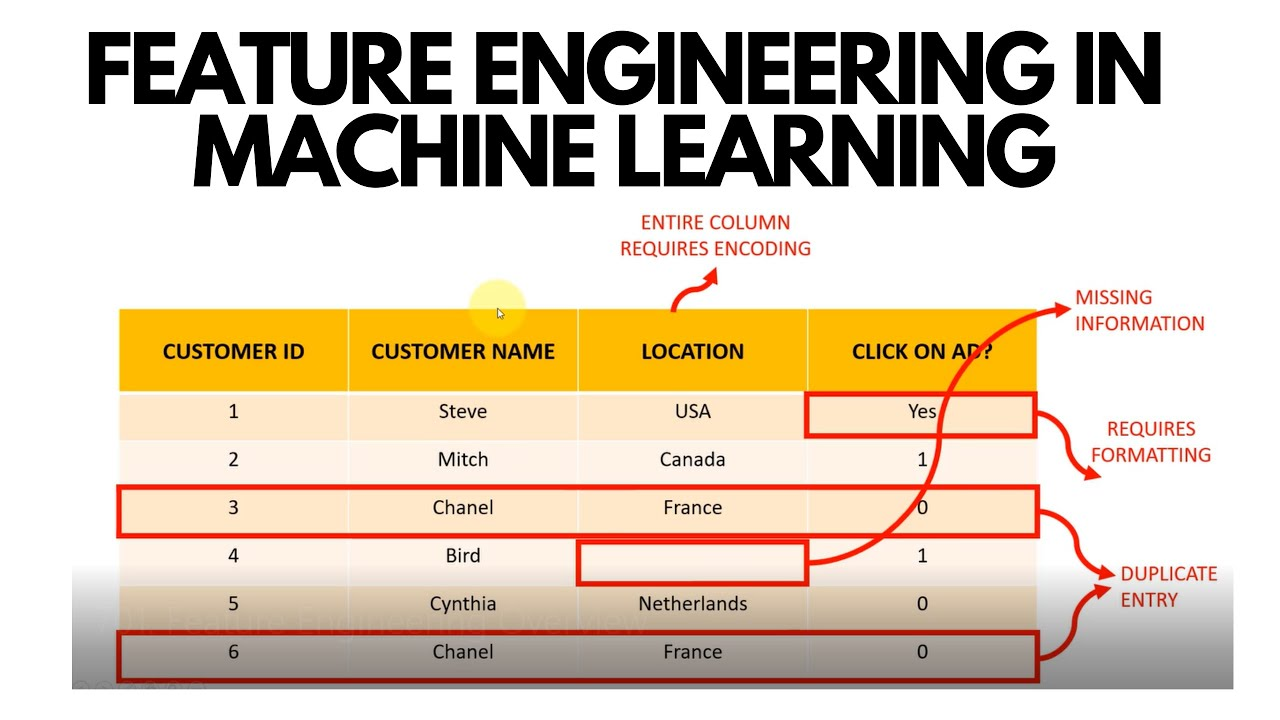

출처 : https://www.youtube.com/watch?v=DkLQtGqQedo

In [70]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print("날짜 : " + train['datetime'][100].split()[0])
print("연도 : " + train['datetime'][100].split()[0].split("-")[0])
print("월 : " + train['datetime'][100].split()[0].split("-")[1])
print("일 : " + train['datetime'][100].split()[0].split("-")[2])
print("시간 : " + train['datetime'][100].split()[1])
print("시 : " + train['datetime'][100].split()[1].split(":")[0])
print("분 : " + train['datetime'][100].split()[1].split(":")[1])
print("초 : " + train['datetime'][100].split()[1].split(":")[2])


2011-01-05 09:00:00
['2011-01-05', '09:00:00']
날짜 : 2011-01-05
연도 : 2011
월 : 01
일 : 05
시간 : 09:00:00
시 : 09
분 : 00
초 : 00


In [71]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])


In [72]:
from datetime import datetime
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))
# 요일을 정수로 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


#### 왜 one-hot-encoding을 하지 않는가? 
- 항목들 간에 연속성이 존재하지 않는 경우에 사용함 
- 이 경우 요일은 월~일까지의 연속성이 존재함 
#### 그러면 월요일은 0, 일요일은 6이라 일요일과 월요일 간의 거리가 커지는데? 
- 주기성을 반영할 경우 Cyclic encoding이라는 것을 적용할 수 있음 
- sin, cos을 사용하여 주기성을 반영하도록 인코딩할 수 있음 

In [73]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [74]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [75]:
train.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0  2011-01-01 00:00:00  Spring        0           0   Clear  9.84  14.395   
1  2011-01-01 01:00:00  Spring        0           0   Clear  9.02  13.635   
2  2011-01-01 02:00:00  Spring        0           0   Clear  9.02  13.635   
3  2011-01-01 03:00:00  Spring        0           0   Clear  9.84  14.395   
4  2011-01-01 04:00:00  Spring        0           0   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count        date  year month day  \
0        81        0.0       3          13     16  2011-01-01  2011    01  01   
1        80        0.0       8          32     40  2011-01-01  2011    01  01   
2        80        0.0       5          27     32  2011-01-01  2011    01  01   
3        75        0.0       3          10     13  2011-01-01  2011    01  01   
4        75        0.0       0           1      1  2011-01-01  2011    01  01   

  hour minute second   weekday  
0   00     00     00  Saturday  
1   01     00     00  Saturday  
2   02     00     00  Saturday  
3   03     00     00  Saturday  
4   04     00     00  Saturday

DONE 
- 시각화했을 때 의미파악을 쉽게하기 위해 숫자형 데이터를 문자열로 바꿔주었음  

TODO 
- data는 year, month, day와 중복이므로 추후 제거 
- month를 season으로 치환 (덜 세분화된 피처로 변환) 

## 6.3.4 데이터 시각화 

In [76]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline 

### 분포도 (Distribution plot)

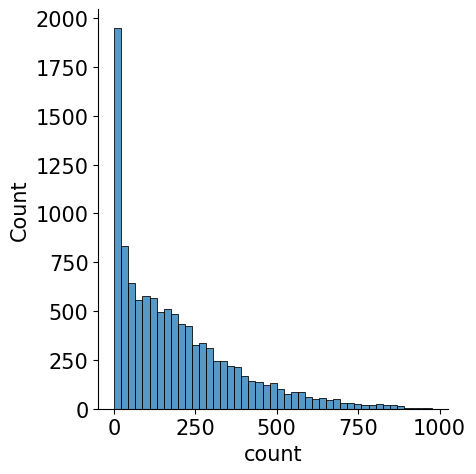

In [77]:
mpl.rc('font', size=15) 
sns.displot(train['count']);

데이터 분포를 정규 분포 형태에 가깝게 만들기 위해 로그 변환
- 회귀 모델 예측 성능을 높이기 위해서

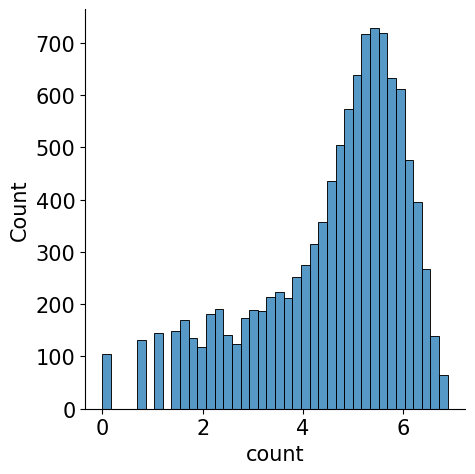

In [78]:
sns.displot(np.log(train['count']));

### Bar plot

[Text(0.5, 1.0, 'Rental amounts by second')]

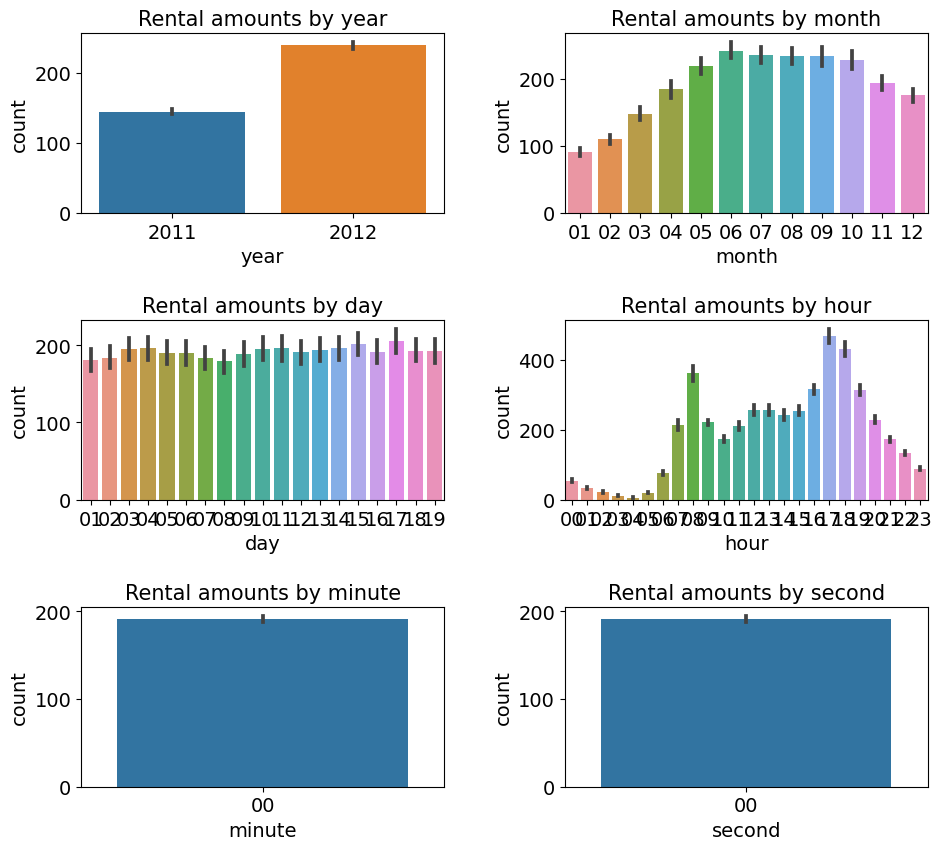

In [79]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

- day : count에 영향이 적고, 훈련데이터와 테스트데이터의 값이 다름 -> 사용하지 않음 
- minute, second : 정보가 없음 -> 사용하지 않음 

### Box plot

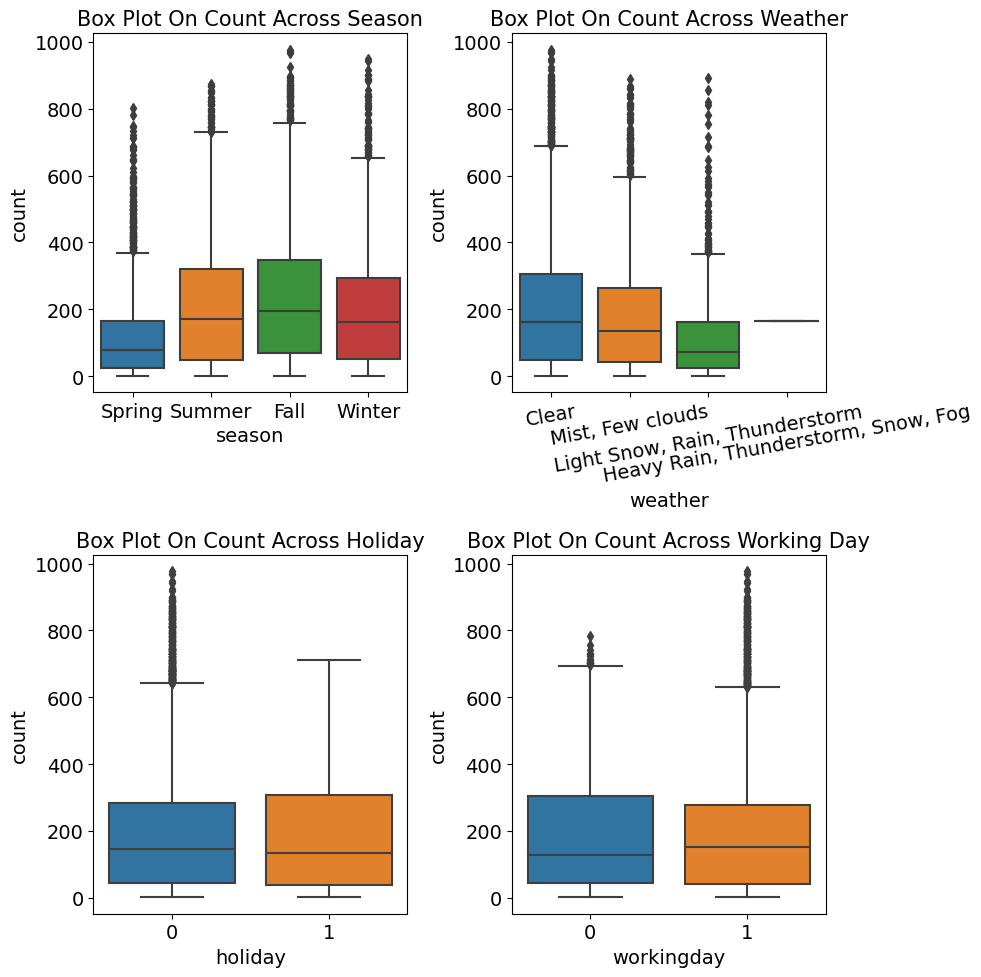

In [80]:
# Step 1 : m행 n열 Figure 준비
figures, axes = plt.subplots(nrows=2, ncols=2) 
plt.tight_layout()
figures.set_size_inches(10,10) 


# Step 2 : 서브플롯 할당 
sns.boxplot(x='season', y='count', data = train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data = train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data = train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data = train, ax=axes[1,1])

# Step 3 : 세부 설정
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Working Day')

axes[0,1].tick_params(axis='x', labelrotation=10)
plt.tight_layout()

### Point plot

<AxesSubplot:xlabel='hour', ylabel='count'>

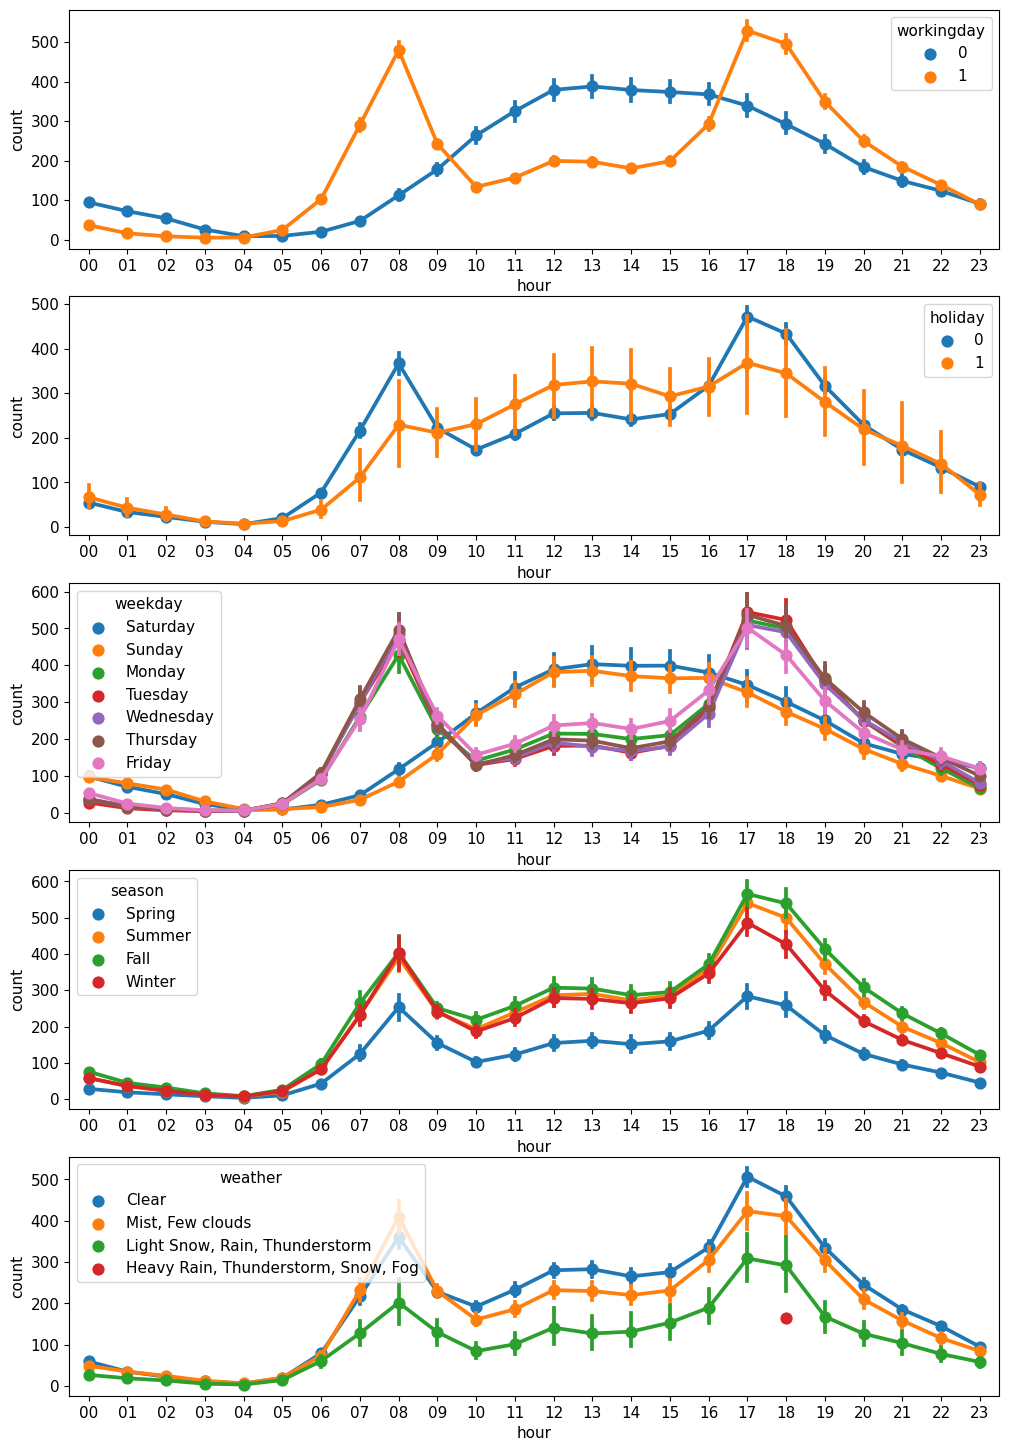

In [81]:
# Step 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

# Step 2 : 서브플롯 할당
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])


분석 결과 
- weather == 4 인 데이터는 제거 (이상치 제거) 

### 회귀선을 포함한 산점도 그래프 

<AxesSubplot:xlabel='humidity', ylabel='count'>

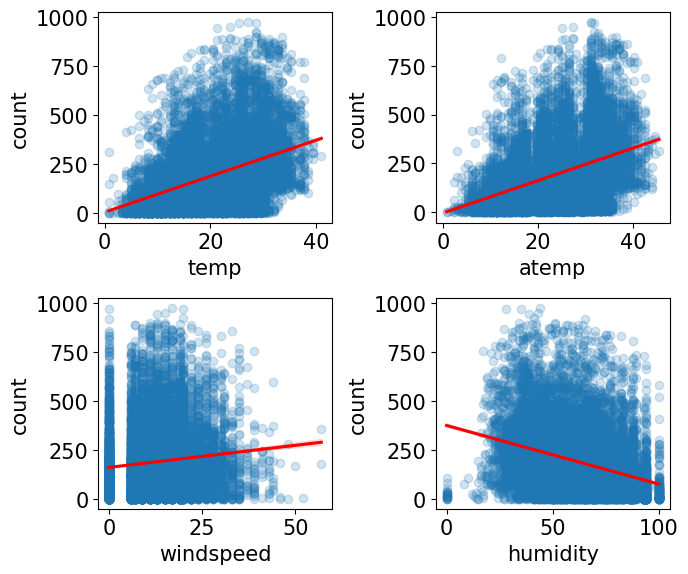

In [82]:
# Step 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

# Step 2 : 서브플롯 할당 
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1], scatter_kws={'alpha':0.2}, line_kws={'color':'red'})

분석 결과 
- 풍속은 결측치가 많기 때문에 피처에서 제거

### Heatmap

In [83]:
# 상관관계 매트릭스
train[['temp', 'atemp', 'humidity', 'windspeed','count']].corr()

temp     atemp  humidity  windspeed     count
temp       1.000000  0.984948 -0.064949  -0.017852  0.394454
atemp      0.984948  1.000000 -0.043536  -0.057473  0.389784
humidity  -0.064949 -0.043536  1.000000  -0.318607 -0.317371
windspeed -0.017852 -0.057473 -0.318607   1.000000  0.101369
count      0.394454  0.389784 -0.317371   0.101369  1.000000

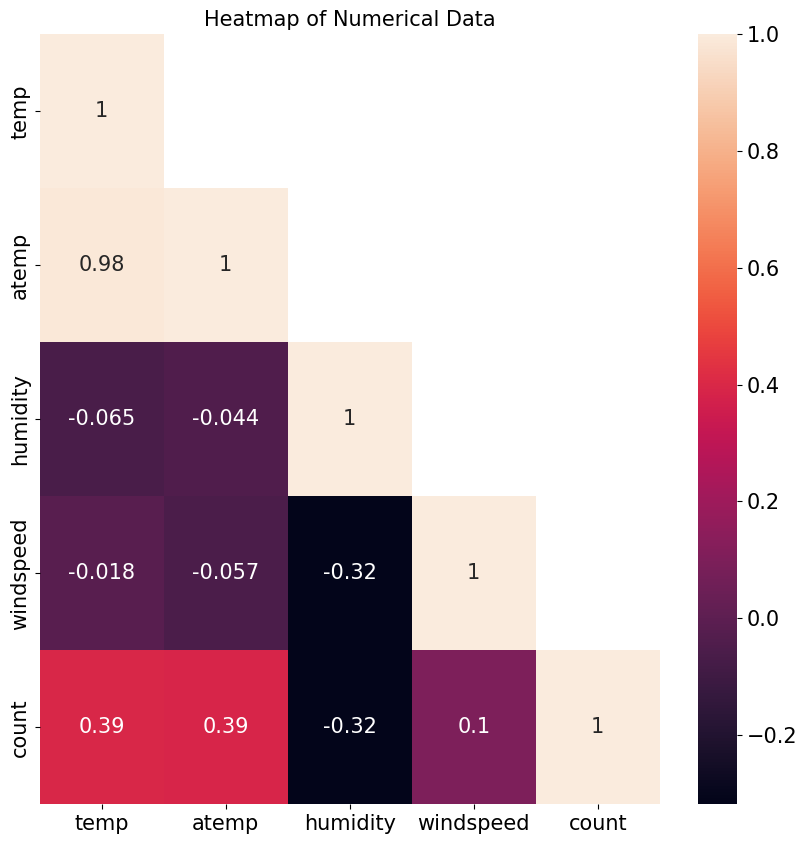

In [84]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed','count']].corr()
mask = np.triu(np.ones_like(corrMat, dtype=bool), k=1)   # Mask for the upper triangle
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, mask=mask, annot=True)
ax.set(title='Heatmap of Numerical Data');

분석 결과 
- windspeed는 상관계수가 0.1로 매우 작음, 피처에서 제거 

## 분석 정리 및 모델링 전략 
1. 타깃값 변환 : 분포도 확인 결과 타깃값인 count가 0근처로 치우쳐 있으므로 로그변환하여 정규분포에 가깝게 만들어야 한다. 
타깃값을 count가 아닌 log로 변환해 사용할 것이므로 마지막에 다시 지수변환해 count로 복원해야한다. 
2. 파생 피처 추가 : datetime은 여러 정보가 혼합되어있으므로 각각을 분리해 year, month, ... 피처를 생성할 수 있다. 
3. 파생 피처 추가 : datetime에 숨어있는 요일(weekday)피처를 추가할 수 있다. 
4. 피처 제거 : 테스트 데이터에 없는 데이터는 훈련에 사용해도 큰 의미가 없으므로 제거한다. 
5. 피처 제거 : datetime은 인덱스 역할만 하므로 제거한다. 
6. 피처 제거 : date 피처가 제공하는 정보는 이미 year, month, day에 있으므로 제거한다. 
7. 피처 제거 : month는 season 피처의 세부 분류로 볼 수 있다. 데이터가 지나치게 세분화되는 경우 오히려 학습에 방해될 수 있으므로 제거한다. 
8. 피처 제거 : 막대 그래프 확인 결과 day는 분별력이 없으므로 제거한다. 
9. 피처 제거 : minute과 second에는 정보가 없으므로 제거한다. 
10. 이상치 제거 : weather가 4인 데이터는 이상치로, 제거한다. 
11. 피처 제거 : 산점도 그래프와 히트맵 확인 결과 windspeed 피처에는 결측값이 많고, 상관관계가 약하므로 제거한다. 

## 모델링 전략 
연습을 위해 기본적인 모델들을 사용
- 베이스 라인 모델 : LinearRegression 
- 성능 개선 : Ridge, LASSO, Random Forest 
    - 피처 엔지니어링 : 모든 모델에서 동일하게 수행 
    - 하이퍼파라미터 최적화 : 그리드서치 
- 기타 : 타깃값이 count가 아닌 log(count)
참고 코드 : https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile



# 6.4 베이스라인 모델 
프로세스 
1. 데이터 불러오기 
2. 기본적인 피처 엔지니어링
3. 평가지표 계산 함수 작성
4. 모델 훈련
5. 성능 검증
6. 제출

In [85]:
import pandas as pd 
data_path = 'data/bike-sharing-demand/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')


## 6.4.1 피처 엔지니어링 
- 전체 데이터셋 (훈련 + 테스트)에 대해서 적용한 다음 다시 훈련 셋, 테스트 셋으로 분리

### 이상치 제거 

In [86]:
train = train[train['weather'] != 4]

#### 왜 이상치는 합치기 전에 제거하지? 
- 이상치를 판단하는 기준이 train set에서 임. 
- test set에서도 마찬가지로 이상치를 제거하는 것은 test set의 통계정보를 사용하는 것이 됨
- test set에 대해서 정보를 어떠한 의미로는 사용하게 되면 Memory Leak이 발생하는 것임

### 데이터 합치기 

In [87]:
all_data_temp = pd.concat([train, test])
all_data_temp

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  casual  registered  count  
0     14.395        81     0.0000     3.0        13.0   16.0  
1     13.635        80     0.0000     8.0        32.0   40.0  
2     13.635        80     0.0000     5.0        27.0   32.0  
3     14.395        75     0.0000     3.0        10.0   13.0  
4     14.395        75     0.0000     0.0         1.0    1.0  
...      ...       ...        ...     ...         ...    ...  
6488  12.880        60    11.0014     NaN         NaN    NaN  
6489  12.880        60    11.0014     NaN         NaN    NaN  
6490  12.880        60    11.0014     NaN         NaN    NaN  
6491  13.635        56     8.9981     NaN         NaN    NaN  
6492  13.635        65     8.9981     NaN         NaN    NaN  

[17378 rows x 12 columns]

In [88]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
17373  2012-12-31 19:00:00       1        0           1        2  10.66   
17374  2012-12-31 20:00:00       1        0           1        2  10.66   
17375  2012-12-31 21:00:00       1        0           1        1  10.66   
17376  2012-12-31 22:00:00       1        0           1        1  10.66   
17377  2012-12-31 23:00:00       1        0           1        1  10.66   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000     3.0        13.0   16.0  
1      13.635        80     0.0000     8.0        32.0   40.0  
2      13.635        80     0.0000     5.0        27.0   32.0  
3      14.395        75     0.0000     3.0        10.0   13.0  
4      14.395        75     0.0000     0.0         1.0    1.0  
...       ...       ...        ...     ...         ...    ...  
17373  12.880        60    11.0014     NaN         NaN    NaN  
17374  12.880        60    11.0014     NaN         NaN    NaN  
17375  12.880        60    11.0014     NaN         NaN    NaN  
17376  13.635        56     8.9981     NaN         NaN    NaN  
17377  13.635        65     8.9981     NaN         NaN    NaN  

[17378 rows x 12 columns]

### 파생 피처(변수) 추가

In [89]:
from datetime import datetime
print(train['datetime'].head())
# 날짜 피처 생성 
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 치처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object


In [90]:
# datetime 타입으로 바꾸기
all_data['datetime'] = pd.to_datetime(all_data['datetime'])
all_data['year'] = all_data['datetime'].dt.year # 연도
all_data['month'] = all_data['datetime'].dt.month # 월
all_data['hour'] = all_data['datetime'].dt.hour # 시간
all_data["weekday"] = all_data['datetime'].dt.weekday # 요일

### 필요 없는 피처 제거 
- 테스트 데이터에 없는 피처 제거 : casual, registered
- 중복되는 정보 제거 : date 
- season이 month의 대분류 역할을 하므로 month 제거 
- 타겟값과 상관관계가 약한 정보 : windspeed 제거 

In [91]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']
all_data = all_data.drop(drop_features, axis=1)

피처 선택 
- 어떤 피처를 사용해야 예측 성능이 좋을까. 
- 탐색적 데이터 분석, 피처 중요도, 상관관계 매트릭스 등을 고려 

### 데이터 나누기 

In [92]:
from IPython.display import display
# 훈련 데이터와 테스트 데이터 나누기 
X_train = all_data[~pd.isnull(all_data['count'])] # Boolean Indexing, 결측치가 아닌 행들만 선택해서 훈련 셋에 저장
X_test = all_data[pd.isnull(all_data['count'])] # Boolean Indexing, 결측치인 행들만 선택해서 테스트 셋에 저장
# 타깃값 count 제거 0
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)
y = train['count']

print("X_train")
display(X_train.head())
print("X_test")
display(X_test.head())

X_train


season  holiday  workingday  weather  temp   atemp  humidity  year  \
0       1        0           0        1  9.84  14.395        81  2011   
1       1        0           0        1  9.02  13.635        80  2011   
2       1        0           0        1  9.02  13.635        80  2011   
3       1        0           0        1  9.84  14.395        75  2011   
4       1        0           0        1  9.84  14.395        75  2011   

   weekday  hour  
0        5     0  
1        5     1  
2        5     2  
3        5     3  
4        5     4

X_test


season  holiday  workingday  weather   temp   atemp  humidity  year  \
10885       1        0           1        1  10.66  11.365        56  2011   
10886       1        0           1        1  10.66  13.635        56  2011   
10887       1        0           1        1  10.66  13.635        56  2011   
10888       1        0           1        1  10.66  12.880        56  2011   
10889       1        0           1        1  10.66  12.880        56  2011   

       weekday  hour  
10885        3     0  
10886        3     1  
10887        3     2  
10888        3     3  
10889        3     4

## 6.4.2 평가지표 계산 함수 작성 
RMSLE \
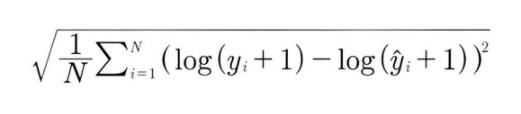

In [93]:
import numpy as np 
def rmsle(y_true, y_pred, convertExp=True): 
    # 지수 변환 
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred) 
    # 로그 변환 후 결측값을 0으로 변환 
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1)) 

    # RMSLE 
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output 

## 6.4.3 모델 훈련
선형 회귀 모델 훈련 : 독립변수(피처)와 종속변수(타깃값)인 log_y에 대응하는 선형 회귀 계수를 구함

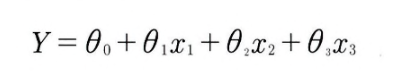

In [94]:
from sklearn.linear_model import LinearRegression 
linear_reg_model = LinearRegression() 

log_y = np.log(y) #타깃값 로그변환 
linear_reg_model.fit(X_train, log_y) # 모델 훈련 

LinearRegression()

- 훈련 : 피처(독립변수)와 타깃값(종속변수)이 주어졌을 때 최적의 가중치(회귀계수)를 찾는 과정 
- 예측 : 최적의 가중치를 아는 상태(훈련된 모델)에서 새로운 독립변수(데이터)가 주어졌을 때 타깃값을 추정하는 과정
- 탐색적 데이터 분석 : 예측에 ㅗ움이 될 피처를 추리고, 적절한 모델링 방법을 탐색하는 과정 
- 피처 엔지니어링 : 추려진 피처들을 훈련에 적합하도록, 성능 향상에 도움되도록 가공하는 과정

## 6.4.4 모델 성능 검증 

In [95]:
preds = linear_reg_model.predict(X_train) 

In [96]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0205


## 6.4.5 예측 및 결과 제출 

In [97]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측 
submission['count'] = np.exp(linearreg_preds) 
submission.to_csv('submission.csv', index=False)

# 6.5 성능 개선 1 : 릿지 회귀 모델 

- L2 Regularization를 적용한 선형 회귀 모델 
- 성능이 좋은 편은 아님. 단순 선형 회귀 모델보다 과대적합이 적음 

## 6.5.1 하이퍼파라미터 최적화 
- Grid Search를 사용 
    - 하이퍼파라미터를 grid 처럼 순회하여 최적값 탐색 
    - 각 하이퍼파라미터를 적용한 모델마다 교차 검증(cross-validation)하여 성능을 최대화하는 값을 선택

    
    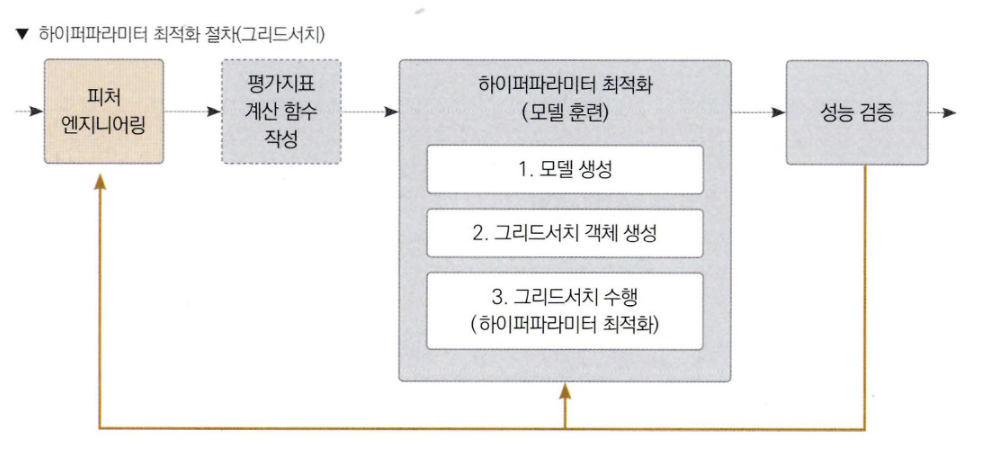

In [98]:
# 릿지 모델 생성 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics 

ridge_model = Ridge() 

In [99]:
# 하이퍼파라미터 값 목록 
ridge_params = {'max_iter': [3000], 'alpha':[0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}

#교차 검증용 평가 함수 (RMSLE 점수 계산) 
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) 

# 그리드서치(with 릿지) 객체 생성 
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,    #릿지 모델 
                                      param_grid=ridge_params,  #값 목록
                                      scoring=rmsle_scorer,     #평가 지표 
                                      cv=5)                     #교차 검증 분할 수 

In [100]:
# 그리드 서치 수행 
log_y = np.log(y) #타깃값 로그 변환 
gridsearch_ridge_model.fit(X_train, log_y) # 훈련 (그리드서치) 
print('최적 하이퍼파라미터 : ', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.1, 'max_iter': 3000}


## 6.5.2 성능 검증

In [101]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 1.0205


# 6.6 성능 개선 2 : 라쏘 회귀 모델 
- L1 Regularization을 적용한 선형 회귀 모델 

## 6.6.1 하이퍼파라미터 최적화(모델 훈련) 

In [102]:
from sklearn.linear_model import Lasso 
# 모델 생성
lasso_model = Lasso() 
# 하이퍼파라미터 값 목록 
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha': lasso_alpha}
# 그리드서치(with 라쏘 객체 생성) 
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행 
log_y = np.log(y) 
gridsearch_lasso_model.fit(X_train, log_y) 

print('최적 하이퍼파라미터 : ', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.00125, 'max_iter': 3000}


## 6.6.2 성능 검증

In [103]:
# 예측 
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가 
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


# 6.7 성능 개선 3 : 랜덤 포레스트 회귀 모델

In [104]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42],               # 랜덤 시드값 
            'n_estimators':[64, 128, 256]}     # 결정 트리 개수 
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5) #
# 그리드서치 수행 
log_y = np.log(y) 
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터: ', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터:  {'n_estimators': 256, 'random_state': 42}


In [105]:
# 예측 
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가 
print(f'랜덤 포레스트 회귀 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값: 0.1117


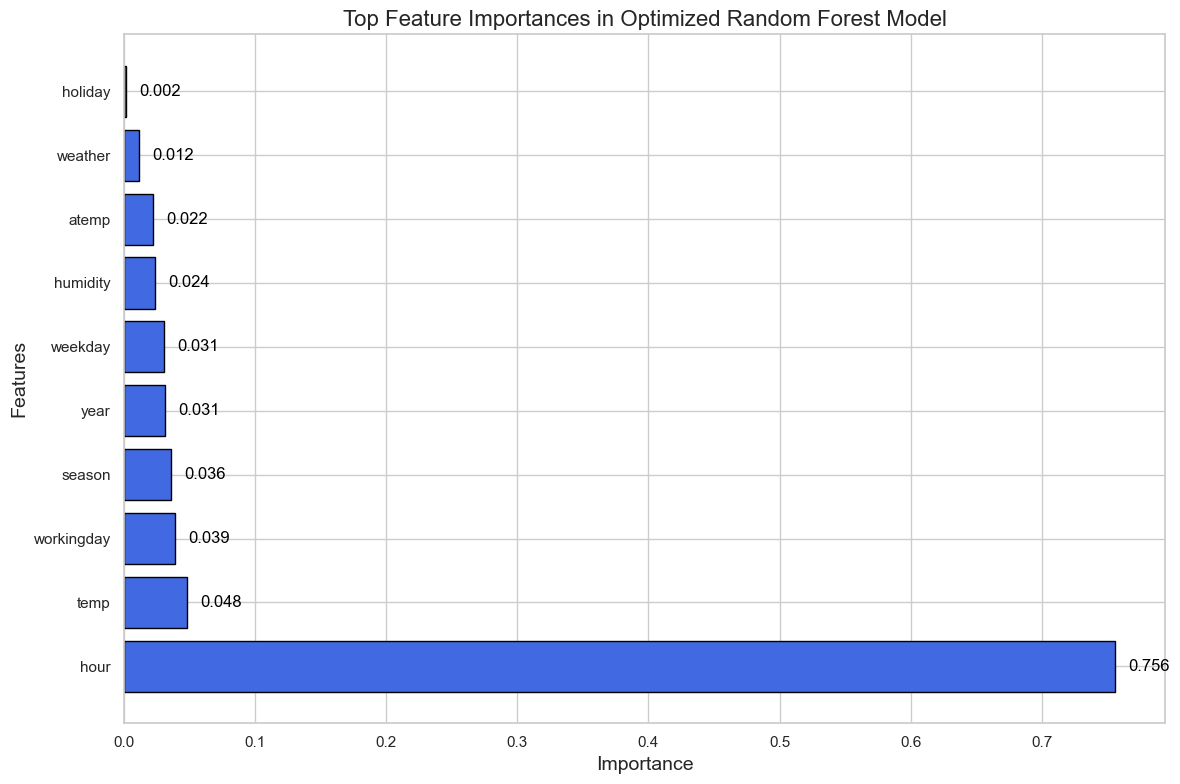

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일로 시각화 설정
sns.set(style="whitegrid")

# 그리드 서치에서 최적화된 랜덤 포레스트 모델에서 피처 중요도 추출
best_rf_model = gridsearch_random_forest_model.best_estimator_
feature_importances = best_rf_model.feature_importances_

# 피처 중요도를 데이터프레임으로 정리하고 중요도가 높은 순으로 정렬
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)  # 막대그래프 순서 맞춤

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue', edgecolor='black')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top Feature Importances in Optimized Random Forest Model', fontsize=16)

# 그래프 내 피처 중요도 값 레이블 표시
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.3f}', va='center', fontsize=12, color='black')

# 여백과 스타일 조정
plt.gca().invert_yaxis()  # 가장 중요한 피처가 위로 오게 정렬
plt.tight_layout()  # 여백 자동 조정
plt.show()


# 6.7.3 예측 및 결과 제출 

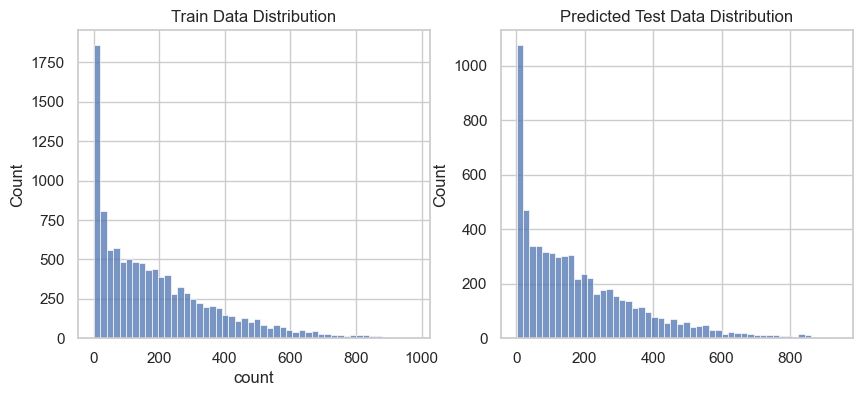

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt 

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2) 
figure.set_size_inches(10,4) 

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [108]:
submission['count'] = np.exp(randomforest_preds) # 지수 변환 
submission.to_csv('submission.csv', index=False)

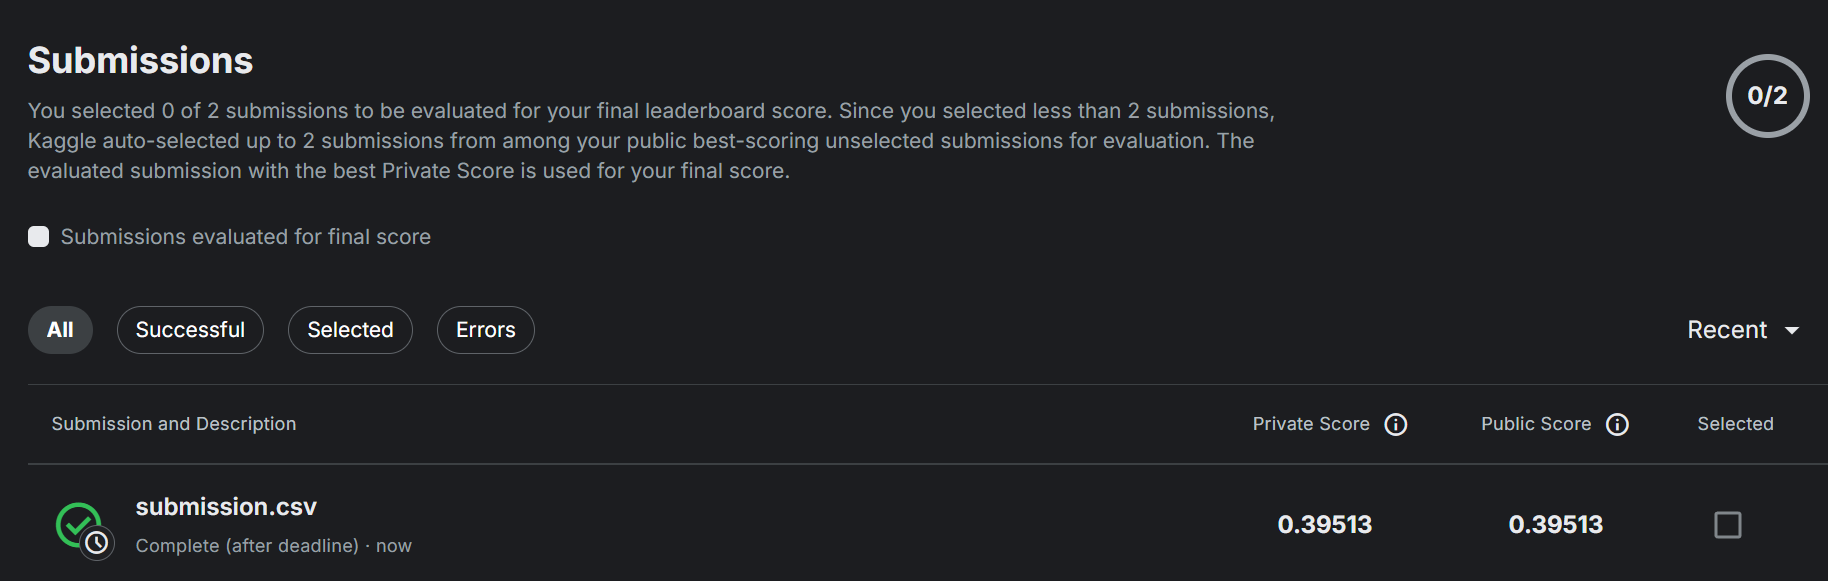

## PlayGround : 모델 개선 해보기


#### 교차 검증 방법 : TimeSeriesSplit 
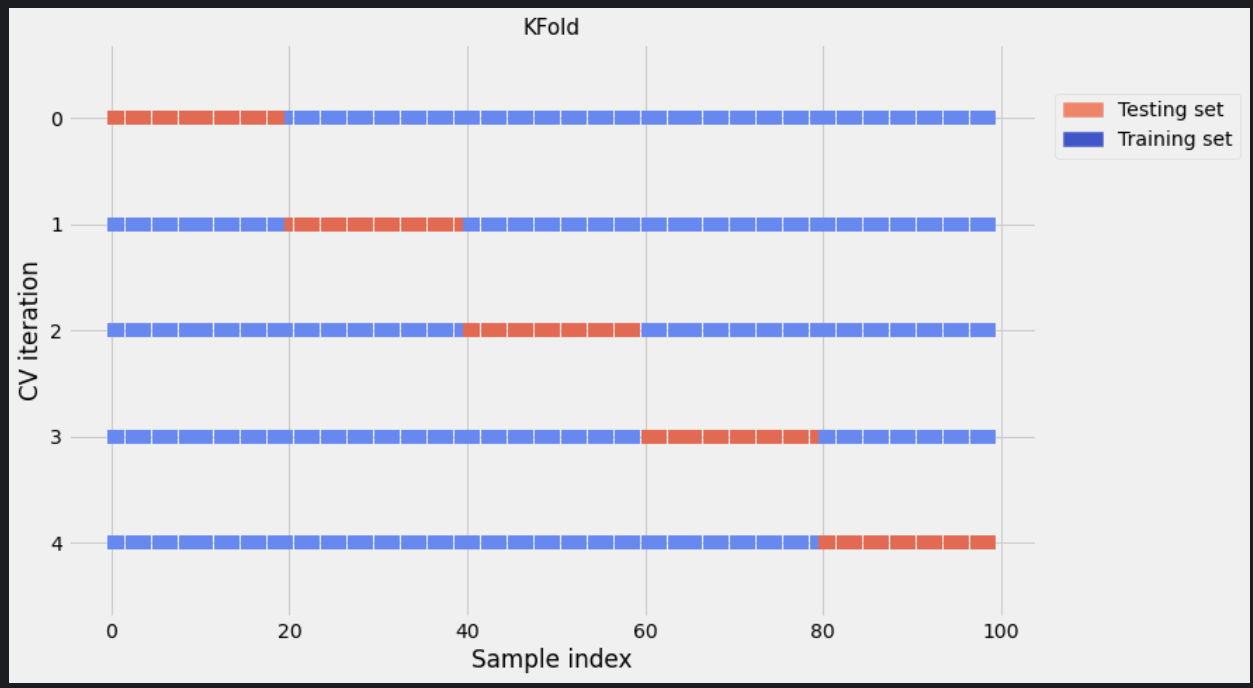
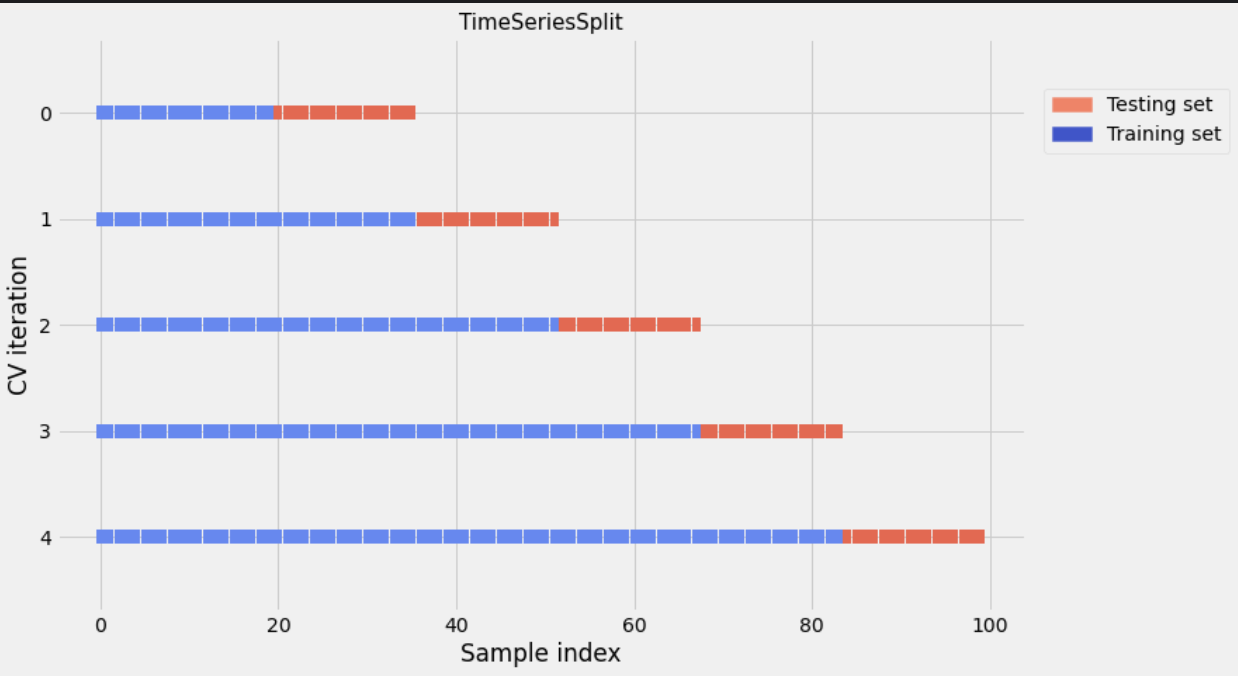
참조 : https://www.kaggle.com/code/tomwarrens/timeseriessplit-how-to-use-it 

Fitting 5 folds for each of 3 candidates, totalling 15 fits

=== Results ===
Best parameters: {'n_estimators': 256}
Fold 1 RMSLE: 0.0991
Fold 2 RMSLE: 0.1155
Fold 3 RMSLE: 0.1140
Fold 4 RMSLE: 0.0985
Fold 5 RMSLE: 0.1046

Average RMSLE: 0.1064


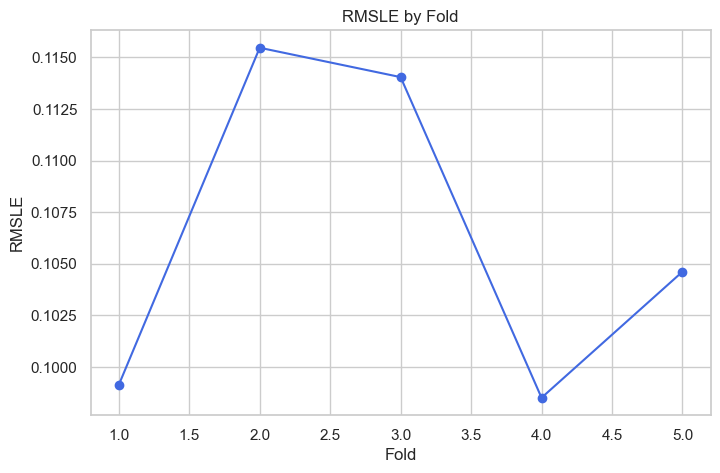

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TimeSeriesSplit 객체 생성
tscv = TimeSeriesSplit(n_splits=5)

# 모델과 파라미터 그리드 설정
rf_model = RandomForestRegressor(random_state=42, bootstrap=True)
param_grid = {
    'n_estimators': [64, 128, 256]
    # 'max_samples': [0.8, 0.9],        # 부트스트랩 샘플 크기 (시간 순서 고려)
    
    # # 2. 과적합 방지를 위한 파라미터
    # 'max_depth': [10, 15],             # 적당한 깊이로 제한
    # 'min_samples_leaf': [5, 10],       # 리프노드의 최소 샘플 수를 늘림
}

# GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring=rmsle_scorer,
    cv=tscv,
    verbose=1  # 진행상황 출력
)

# 학습
log_y = np.log(y)
grid_search.fit(X_train, log_y)

# 결과 출력
print("\n=== Results ===")
print(f"Best parameters: {grid_search.best_params_}")

# 각 fold에 대해 직접 성능 평가
fold_scores = []
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):
    # 최적 모델로 예측
    val_pred = grid_search.best_estimator_.predict(X_train.iloc[val_idx])
    score = rmsle(log_y.iloc[val_idx], val_pred, True)
    fold_scores.append(score)
    print(f"Fold {fold} RMSLE: {score:.4f}")

print(f"\nAverage RMSLE: {np.mean(fold_scores):.4f}")

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), fold_scores, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Fold')
plt.ylabel('RMSLE')
plt.title('RMSLE by Fold')
plt.grid(True)
plt.show()

# 최종 예측
final_model = grid_search.best_estimator_
randomforest_preds = final_model.predict(X_test)
submission['count'] = np.exp(randomforest_preds)
submission.to_csv('submission_time_series_split.csv', index=False)

#### 결과 
- 제출 결과는 동일함
- gridsearch를 통해 찾은 파라미터 값이 동일하기 때문. 학습은 동일하게 전체 데이터에 대해서 같은 모델로 수행됨.

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from IPython.display import display
import pandas as pd
import numpy as np

# 1. 피처 엔지니어링 - 사이클릭 인코딩
# 'hour'와 'weekday' 피처에 대해 주기성을 반영하여 사이클릭 인코딩 적용
all_data_copy = all_data.copy()
all_data_copy['hour_sin'] = np.sin(2 * np.pi * all_data_copy['hour'] / 24)
all_data_copy['hour_cos'] = np.cos(2 * np.pi * all_data_copy['hour'] / 24)

all_data_copy['weekday_sin'] = np.sin(2 * np.pi * all_data_copy['weekday'] / 7)
all_data_copy['weekday_cos'] = np.cos(2 * np.pi * all_data_copy['weekday'] / 7)

# 기존 hour와 weekday 피처 제거
all_data_copy = all_data_copy.drop(['hour', 'weekday'], axis=1)

# 2. 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_copy[~pd.isnull(all_data_copy['count'])]
X_test = all_data_copy[pd.isnull(all_data_copy['count'])]

# 타깃 값 설정 및 count 열 제거
y = train['count']
X_train = X_train.drop(['count'], axis=1)  # 학습 데이터에서 불필요한 열 제거
X_test = X_test.drop(['count'], axis=1)    # 테스트 데이터에서 불필요한 열 제거

# 피처 엔지니어링 후 데이터 확인
print("X_train with feature engineering:")
display(X_train.head())
print("X_test with feature engineering:")
display(X_test.head())

# 3. 모델 설정 및 그리드 서치
# 로그 변환된 타깃 설정
log_y = np.log(y)

# 모델 및 그리드 서치 설정
randomforest_model = RandomForestRegressor()
rf_params = {'random_state': [42], 'n_estimators': [64, 128, 256]}

gridsearch_random_forest_model = GridSearchCV(
    estimator=randomforest_model,
    param_grid=rf_params,
    scoring=rmsle_scorer, 
    cv=5
)

# 모델 학습
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터: ', gridsearch_random_forest_model.best_params_)

# 학습 데이터에 대한 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'랜덤 포레스트 회귀 RMSLE 값: {rmsle(log_y, preds, True):.4f}') 

# 4. 테스트 데이터 예측 및 제출 파일 생성
test_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)
submission['count'] = np.exp(test_preds)
submission.to_csv('submission_with_cyclic_encoding.csv', index=False)



X_train with feature engineering:


season  holiday  workingday  weather  temp   atemp  humidity  year  \
0       1        0           0        1  9.84  14.395        81  2011   
1       1        0           0        1  9.02  13.635        80  2011   
2       1        0           0        1  9.02  13.635        80  2011   
3       1        0           0        1  9.84  14.395        75  2011   
4       1        0           0        1  9.84  14.395        75  2011   

   hour_sin  hour_cos  weekday_sin  weekday_cos  
0  0.000000  1.000000    -0.974928    -0.222521  
1  0.258819  0.965926    -0.974928    -0.222521  
2  0.500000  0.866025    -0.974928    -0.222521  
3  0.707107  0.707107    -0.974928    -0.222521  
4  0.866025  0.500000    -0.974928    -0.222521

X_test with feature engineering:


season  holiday  workingday  weather   temp   atemp  humidity  year  \
10885       1        0           1        1  10.66  11.365        56  2011   
10886       1        0           1        1  10.66  13.635        56  2011   
10887       1        0           1        1  10.66  13.635        56  2011   
10888       1        0           1        1  10.66  12.880        56  2011   
10889       1        0           1        1  10.66  12.880        56  2011   

       hour_sin  hour_cos  weekday_sin  weekday_cos  
10885  0.000000  1.000000     0.433884    -0.900969  
10886  0.258819  0.965926     0.433884    -0.900969  
10887  0.500000  0.866025     0.433884    -0.900969  
10888  0.707107  0.707107     0.433884    -0.900969  
10889  0.866025  0.500000     0.433884    -0.900969

최적 하이퍼파라미터:  {'n_estimators': 256, 'random_state': 42}
랜덤 포레스트 회귀 RMSLE 값: 0.1136


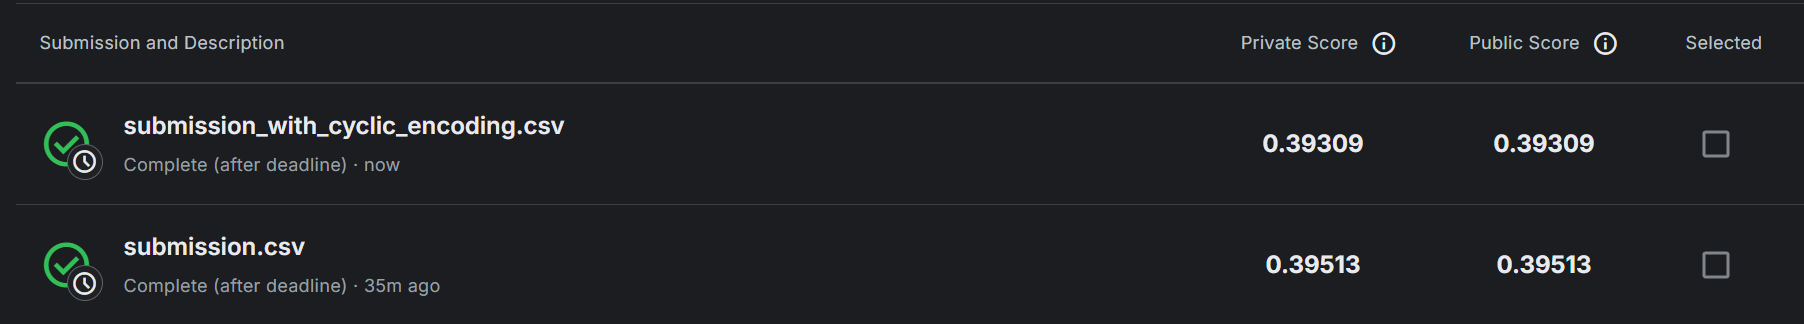

#### 결과 분석 
- 성능차이가 크지 않은 이유는 ? 
    - 해당 피쳐 자체가 중요하지 않았을 수 있다 ? 
    - 이 경우에는 시간의 연속성이 중요하지 않을 수 있다 ? 
    - 랜덤포레스트 모델의 한계 ? 
        - 랜덤포레스트와 같은 트리 기반 모델은 순서나 주기성을 잘 반영하지 못한다 ? 
            - 주기성을 잘 반영할 수 있는 모델 활용 : ARIMA, LSTM ...

# 학습 마무리 
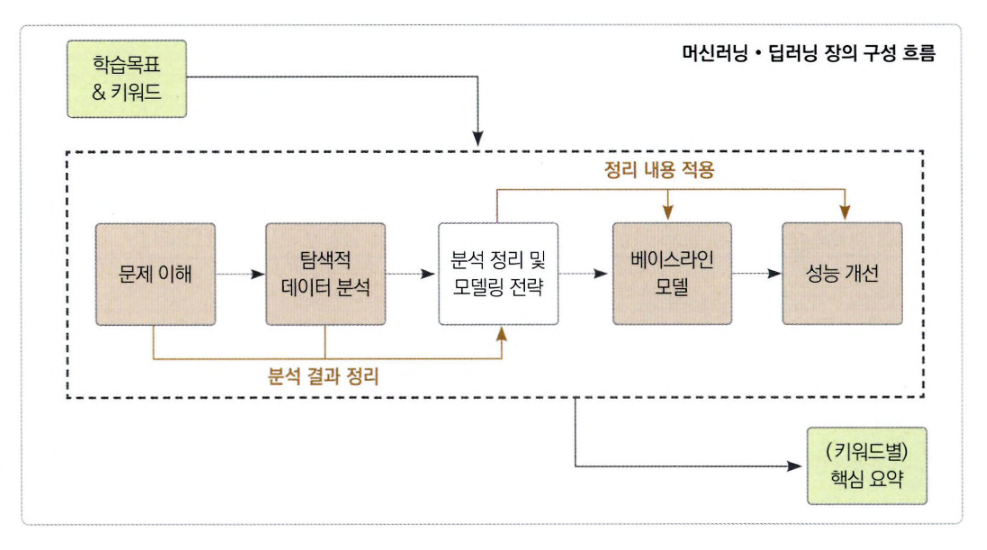


프로세스 
- 문제 이해 -> 탐색적 데이터 분석 -> 분석 결과 정리 -> 모델링 전략 & 베이스라인 모델 선정 -> 성능 개선
